In [2]:
import cv2
import faiss
import os
import numpy as np
import pandas as pd
import scipy
from scipy.spatial.distance import cosine
import random
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

In [3]:
from vzam import *

In [4]:
TMP_DIR = 'tmp'
FRAMES_DIR = 'tmp/frames'
TRAIN_VIDEOS_DIR = 'data/train_videos'
TEST_VIDEOS_DIR = 'data/test_videos'
FEATURE_EXTRACTOR = local_histogram_features

In [8]:
fpaths = [os.path.join(TRAIN_VIDEOS_DIR, fpath) for fpath in os.listdir(TRAIN_VIDEOS_DIR)]
train_df = get_dataframe(fpaths,
                         feature_extractor=FEATURE_EXTRACTOR,
                         preprocessor=preprocess_image_load,
                         write_frames_dir=FRAMES_DIR,
                         mod_filter=15,
                         )

Done 0.2
Done 0.4
Done 0.6
Done 0.8
Done 1.0


Failed to parse extradata


In [9]:
train_df.head()

,video_path,frame_time,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_890,x_891,x_892,x_893,x_894,x_895,x_896,x_897,x_898,x_899
0,data/train_videos/1948 - So Dear to My Heart.mp4,35.0,0.000168,0.000497,0.001907,0.002069,0.001017,0.003272,0.000179,0.001116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,data/train_videos/1948 - So Dear to My Heart.mp4,72.6,0.000237,0.000410,0.002220,0.004543,0.007069,0.004676,0.000618,0.001237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,data/train_videos/1948 - So Dear to My Heart.mp4,107.6,0.000052,0.000381,0.001520,0.000381,0.000763,0.009682,0.000358,0.001312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,data/train_videos/1948 - So Dear to My Heart.mp4,145.1,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,data/train_videos/1948 - So Dear to My Heart.mp4,182.7,0.000000,0.000000,0.001023,0.002393,0.002653,0.030172,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


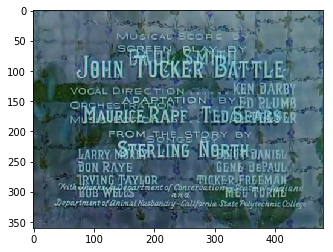

In [32]:
draw_video_frame('data/train_videos/1948 - So Dear to My Heart.mp4', 35*29.5)

In [14]:
# DATASET = 'data/RESNET_CORRUPT'
# TRAIN_CSV = DATASET+'_df.csv'
# SUBCLIPS_CSV = DATASET+'_subclips.csv'
# train_df = pd.read_csv(TRAIN_CSV)
# train_df.head()

In [33]:
frame_times = train_df['frame_time']
labels = train_df.video_path.values
frame_vectors = train_df.drop(['frame_time', 'video_path'], axis=1).values
frame_vectors

array([[1.67622304e-04, 4.97086847e-04, 1.90742628e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.36983265e-04, 4.10385634e-04, 2.21955054e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.20207141e-05, 3.81485239e-04, 1.52016093e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.39666381e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.03376724e-03, 6.53488620e-04, 1.63187552e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.84601304e-05, 0.00000000e+00, 1.14822004e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [34]:
clf = FaissVideoSearcher(frame_vectors, labels, treshold=0.7)

In [36]:
test_videos = [os.path.join(TEST_VIDEOS_DIR, f) for f in os.listdir(TEST_VIDEOS_DIR)]
for fpath in test_videos:
    test_df = get_dataframe([fpath],
                            preprocessor=preprocess_image_load,
                            feature_extractor=FEATURE_EXTRACTOR,
                            write_frames_dir=FRAMES_DIR)   
    test_df_frame_vectors = test_df.drop(['frame_time', 'video_path'], axis=1).values
    predicted_label, votes, dists, indices = clf.classify(test_df_frame_vectors)
    print(fpath)
    print('Classified as', predicted_label)
    #print(votes, dists, indices)
    print(dists)
    print('Closest frames')
    for v, t in zip(votes, frame_times[indices]):
        print(v, t)
    print()

Done 1.0
data/test_videos/the_fun_and_fancy_tree_6.mp4
Classified as data/train_videos/1947 - Fun and Fancy Free.avi
[0.8007243  0.80041206 0.7649218  0.77383983 0.8326136  0.7574779
 0.71434224 0.7659291  0.7710388  0.7195992  0.73407286 0.7485796 ]
Closest frames
data/train_videos/1947 - Fun and Fancy Free.avi 1075.9
data/train_videos/1947 - Fun and Fancy Free.avi 1075.9
data/train_videos/1947 - Fun and Fancy Free.avi 1075.9
data/train_videos/1947 - Fun and Fancy Free.avi 1075.9
data/train_videos/1949 - The Adventures Of Ichabod And Mr. Toad.m4v 1156.6
data/train_videos/1949 - The Adventures Of Ichabod And Mr. Toad.m4v 1156.6
data/train_videos/1949 - The Adventures Of Ichabod And Mr. Toad.m4v 1156.6
data/train_videos/1949 - The Adventures Of Ichabod And Mr. Toad.m4v 1156.6
data/train_videos/1949 - The Adventures Of Ichabod And Mr. Toad.m4v 1156.6
data/train_videos/1948 - So Dear to My Heart.mp4 4474.5
data/train_videos/1947 - Fun and Fancy Free.avi 1075.9
data/train_videos/1947 - Fun